<a href="https://colab.research.google.com/github/1am8anana/1st-Project/blob/main/%E0%B8%87%E0%B8%B2%E0%B8%99%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A12_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

จาก COVID-19 Dataset กลุ่มของพวกเราต้องการที่จะทำนายว่า ผู้ติดเชื้อ COVID-19 มีความเสียงที่จะ "ตาย" หรือ "รอด" โดยการทำนายผลทั้ง 2 ค่านี้สามารถตีความได้ว่าเป็นการ classification, โดยกลุ่มของเราได้เลือก Machine Learning algorithm ที่เรียกว่า Logistic Regression เพื่อมาทำนายผลเพราะเป็น classification algorithm ที่คาดว่าจะสามารถ handle กับปัญหา/Dataset นี้ได้.

**Import Library**

ใน cell ด้านล่างนี้จะเป็น Library ที่เขาไว้ใช้ในการจัดการกับ Dataset เช่น การ plot graph การจัดการ Dataframe etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import & Overview Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Covid Data.csv to Covid Data.csv


In [3]:
df = pd.read_csv("/content/Covid Data.csv")
print("Shape of Dataframe: ", df.shape)
df.head()

Shape of Dataframe:  (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


**About the Dataset**

Dataset นี้มีข้อมูลที่เกี่ยวข้องกับผู้ป่วยที่ไม่ระบุตัวตนจํานวนมากรวมถึงเงื่อนไขล่วงหน้า ชุดข้อมูลดิบประกอบด้วย unique features 21 รายการ และ unique patients 1,048,576 ราย ใน Boolean features 1 หมายถึง "ใช่" และ 2 หมายถึง "ไม่" ค่าเป็น 97 และ 99 ไม่มีข้อมูล.



* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* death: indicates whether the patient died or recovered.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

**Checking Missing values in the Dataframe**

In [5]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

โดยจะเห็นได้ว่าใน Dataframe ของกลุ่มเรานั้น ไม่ได้มีค่า Null/NaN เลย (แต่หากอิงตามที่ผู้จัดเก็บข้อมูลหรือเจ้าของ Dataset ให้มานั้น มีการบอกเอาไว้ว่า "ค่าเป็น 97 และ 99 ไม่มีข้อมูล" ดังนั้นเราต้อง re-check อีกทีว่าใน Dataframe ของเรานั้นมีค่า 97/99 อยู่หรือเปล่า เพื่อให้สามาระนำไป analysis Dataframe อีกขั้นตอนหนึ่ง เพื่อ confirm ว่า Dataframe ของเรานั้นพร้อมสำหรับนำไป train ใน model)

**re-check ค่า 97 และ 99 Dataframe**

โดยจะให้หาค่าที่เป็น 97 กับ 99 แต่ละ columns เลยก็อาจจะเป็นการเสียเวลา ดังนั้นเราจึงคิด solution: เปลี่ยนค่า 97 และ 99 ให้เป็น NaN และค่อยดูอีกทีว่ามีค่า NaN อยู่ใน Dataframe หรือเปล่านั่นเอง

In [6]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in USMER: [2 1]
Unique values in MEDICAL_UNIT: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in SEX: [1 2]
Unique values in PATIENT_TYPE: [1 2]
Unique values in DATE_DIED: ['03/05/2020' '03/06/2020' '09/06/2020' '12/06/2020' '21/06/2020'
 '9999-99-99' '26/02/2020' '05/04/2020' '08/05/2020' '20/05/2020'
 '17/07/2020' '13/01/2020' '22/01/2020' '29/01/2020' '13/02/2020'
 '18/02/2020' '19/02/2020' '20/02/2020' '24/02/2020' '04/03/2020'
 '07/03/2020' '12/03/2020' '14/03/2020' '18/03/2020' '27/03/2020'
 '28/03/2020' '29/03/2020' '02/04/2020' '06/04/2020' '07/04/2020'
 '08/04/2020' '09/04/2020' '10/04/2020' '11/04/2020' '12/04/2020'
 '13/04/2020' '14/04/2020' '15/04/2020' '16/04/2020' '17/04/2020'
 '18/04/2020' '20/04/2020' '21/04/2020' '22/04/2020' '23/04/2020'
 '24/04/2020' '25/04/2020' '26/04/2020' '27/04/2020' '28/04/2020'
 '29/04/2020' '30/04/2020' '01/05/2020' '02/05/2020' '04/05/2020'
 '05/05/2020' '06/05/2020' '07/05/2020' '09/05/2020' '10/05/2020'
 '11/05/2020'

In [7]:
df_fix1 = df.replace({97: np.nan, 98:np.nan, 99:np.nan, '9999-99-99':np.nan})
df_fix1.isna().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED               971633
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
dtype: int64

**Feature Engineering**

In [8]:
df_fe = df_fix1.copy()
df_fe['DEATH'] = np.where(df_fe['DATE_DIED'].isna(), 2, 1)
df_fe = df_fe.drop(columns=['DATE_DIED'])

In [9]:
df_fe.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,192706.000000,1.032572e+06,1.048230e+06,521310.000000,1.045237e+06,1.045572e+06,...,1.045171e+06,1.045471e+06,1.043530e+06,1.045499e+06,1.045543e+06,1.045569e+06,1.045355e+06,1.048575e+06,192543.000000,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,1.825351,1.864379e+00,4.177565e+01,1.984403,1.880420e+00,1.985594e+00,...,1.986442e+00,1.844349e+00,1.973130e+00,1.980135e+00,1.847145e+00,1.981920e+00,1.919285e+00,5.305653e+00,1.912446,1.926622e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,0.379668,3.423854e-01,1.687954e+01,0.123911,3.244694e-01,1.191554e-01,...,1.156451e-01,3.625247e-01,1.617045e-01,1.395369e-01,3.598474e-01,1.332413e-01,2.723973e-01,1.881165e+00,0.282647,2.607556e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,3.000000e+01,2.000000,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,4.000000e+01,2.000000,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000,2.000000e+00,5.300000e+01,2.000000,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,1.210000e+02,2.000000,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000,2.000000e+00


In [10]:
df_fe.isna().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
CLASIFFICATION_FINAL         0
ICU                     856032
DEATH                        0
dtype: int64

**Data imputation**

คือขั้นตอนการเติมข้อมูลที่ขาดหาย เพื่อเติมข้อมูลให้ครบถ้วนและนำไป analysis ในขั้นตอนต่อๆไป | โดยกลุ่มของเราได้วิเคราะห์และทำการตัดสินใจว่าค่า nan หรือ missing values นั้นสามารถแทนค่าเป็น 2 ได้(เนื่องจาก Boolean features 1 หมายถึง "ใช่" และ 2 หมายถึง "ไม่ และจากการสิเคราะห์จึงได้ข้อสรุปว่าหากเปลี่ยน nan เป็น 2 ก็จะทำให้ค่าดู make sense ขึ้น เช่น หาก ICU มีค่าเป็น nan สามารถอ้างอิงได้ว่า nan คือผู้ป่วยที่ไม่ได้เข้ารักษาที่ห้อง ICU นั่นเอง เป็นต้น)

โดยเริ่มจาก check unique values ของ columns ที่มี missing values เพื่อให้แน่ใจว่ามีแค่ค่า 1, 2 และ nan เพราะหาก columns มีค่าอื่นที่ไม่ใช่ boolean features ก็จะไม่แทน/เติมค่า 2 เพราะ values ใน columns นั้นไม่ใช่ values แบบ boolean และหากแทย/เติม 2 ไปจะทำให้ values/columns นั้นไม่ make sense

In [11]:
for column in df_fe.columns:
    unique_values = df_fe[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in USMER: [2 1]
Unique values in MEDICAL_UNIT: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in SEX: [1 2]
Unique values in PATIENT_TYPE: [1 2]
Unique values in INTUBED: [nan  1.  2.]
Unique values in PNEUMONIA: [ 1.  2. nan]
Unique values in AGE: [ 65.  72.  55.  53.  68.  40.  64.  37.  25.  38.  24.  30.  48.  23.
  80.  61.  54.  59.  45.  26.  32.  49.  39.  27.  57.  20.  56.  47.
  50.  46.  43.  28.  33.  16.  62.  58.  36.  44.  66.  52.  51.  35.
  19.  90.  34.  22.  29.  14.  31.  42.  15.   1.   0.  17.  41.   2.
  10.  12.  13.   4.   7.   6.   8.  60.   5.  63.  75.  81.  67.  18.
  70.  88.  85.  92.  73.  74.  78.  76.  82.  77.  86.  71.  95.  87.
  83.  84.  79.  69.  89.   3.  nan  93. 100.  91.  21. 103.  11.   9.
  94.  96. 101. 107. 102. 109. 119. 116. 105. 104. 111. 114. 120. 106.
 108. 110. 118. 117. 121. 115. 113.]
Unique values in PREGNANT: [ 2. nan  1.]
Unique values in DIABETES: [ 2.  1. nan]
Unique values in COPD: [ 2.  1. nan]
Uniqu

เริ่มทำการ แทน/เติมค่าแทนที่ค่า nan ตามที่ได้กำหนดไว้

Column INTUBED นั้นมี nan ดังนั้นเราจึงต้องแปลงค่า nan ให้กลายเป็น 2 เนื่องจาก เราสามารถตีความได้ว่า 2 คือ ไม่ได้สวมใส่เครื่องช่วยหายใจ(INTUBED)นั่นเอง

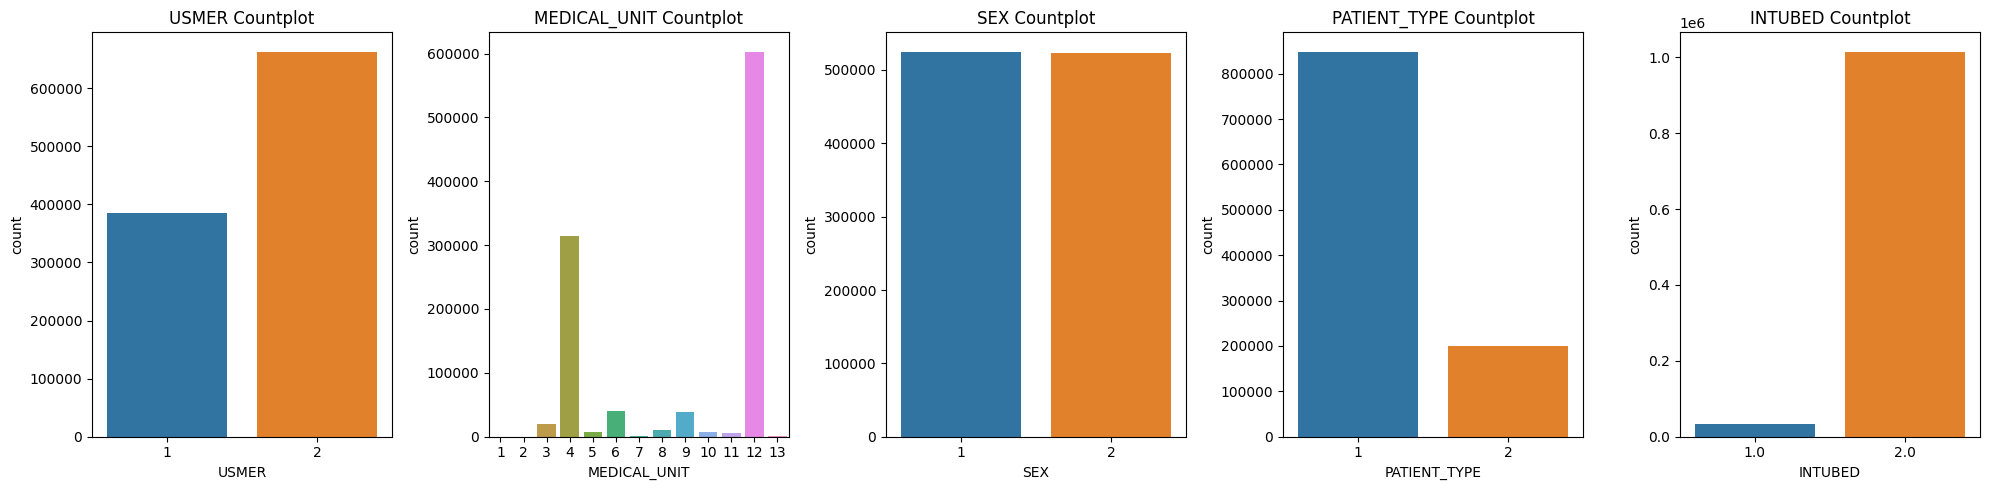

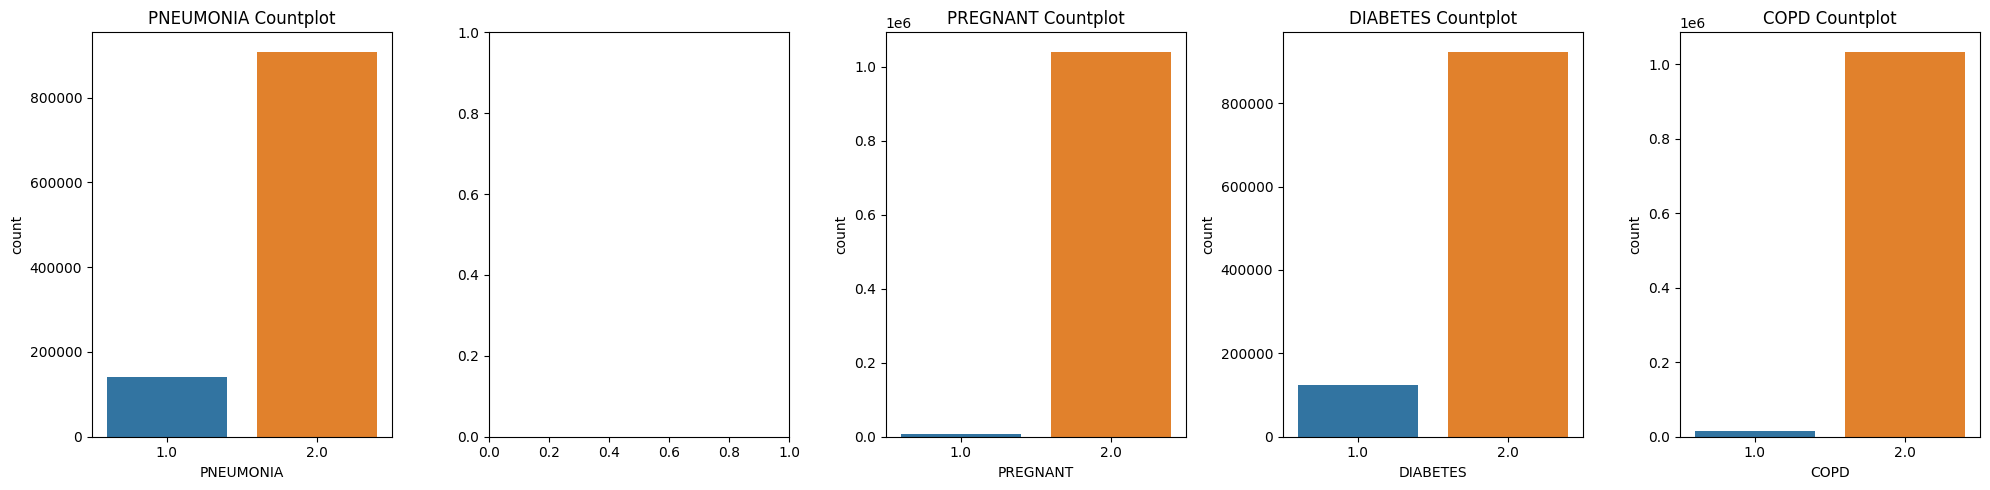

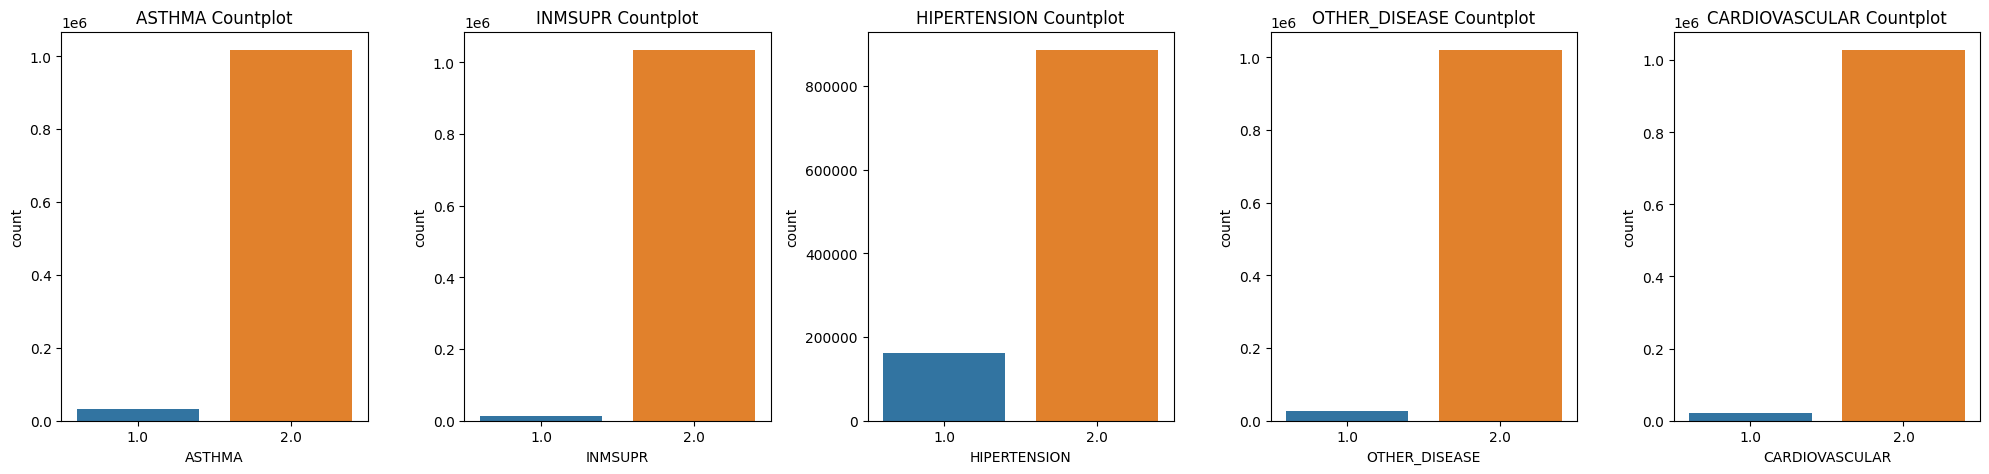

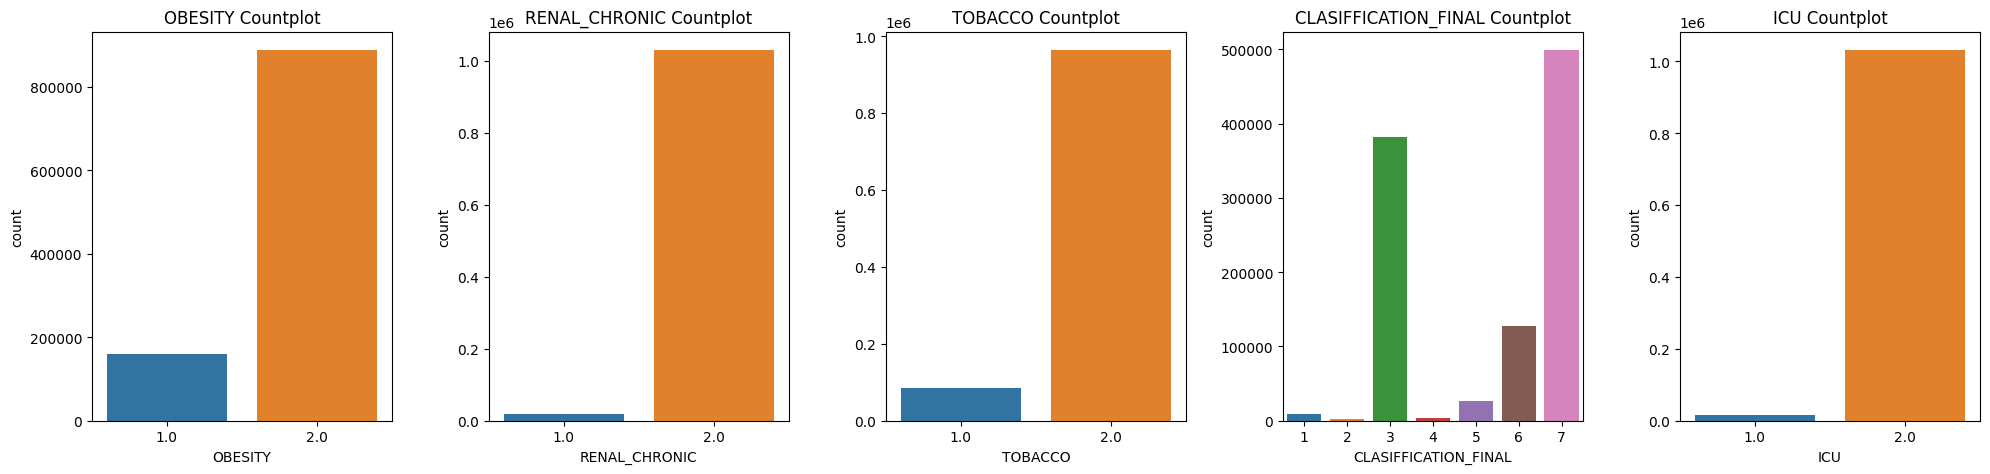

In [12]:
from sklearn.impute import SimpleImputer

# ทำการ imputation ด้วยเลข 2 สำหรับ col ที่มี missing values (ยกเว้น AGE)
imputer = SimpleImputer(strategy='constant', fill_value=2)
columns_with_missing_values = df_fe.columns[df_fe.isnull().any()].tolist()
for column in columns_with_missing_values:
    if column != 'AGE':
        df_fe[column] = imputer.fit_transform(df_fe[[column]])

# แบ่ง countplot ให้อยู่ใน 4 หน้า
num_columns = len(df_fe.columns)
num_columns_per_page = 5

for page in range(4):
    start_idx = page * num_columns_per_page
    end_idx = (page + 1) * num_columns_per_page

    # สร้าง subplots เพื่อแสดง countplot
    fig, axes = plt.subplots(nrows=1, ncols=num_columns_per_page, figsize=(20, 5))
    for i, column in enumerate(df_fe.columns[start_idx:end_idx]):
        if column != 'AGE':
            sns.countplot(data=df_fe, x=column, ax=axes[i])
            axes[i].set_title(f'{column} Countplot')
    plt.tight_layout()
    plt.show()

In [13]:
df_fe.isna().sum()

USMER                     0
MEDICAL_UNIT              0
SEX                       0
PATIENT_TYPE              0
INTUBED                   0
PNEUMONIA                 0
AGE                     345
PREGNANT                  0
DIABETES                  0
COPD                      0
ASTHMA                    0
INMSUPR                   0
HIPERTENSION              0
OTHER_DISEASE             0
CARDIOVASCULAR            0
OBESITY                   0
RENAL_CHRONIC             0
TOBACCO                   0
CLASIFFICATION_FINAL      0
ICU                       0
DEATH                     0
dtype: int64

จะเห็นได้กลุ่มของพวกเราได้ทำ Data imputation เป็นที่เรียบร้อย แต่จะสังเกตุได้ว่าใน column AGE นั้นมี missing valuse อยู่และยังไม่ได้ถูก imputation แต่อย่างใด | เนื่องจาก missing values ที่อยู่ใน column AGE นั้นมีอยู่ 345 values จาก 1048575 values ของทั้งหมด คิดเป็น 0.03% ดังนั้นจึงมองว่า missing values เหล่านั้นส่งผลต่อการทำ Correlation Analysis น้อยมากๆ กลุ่ใของพวกเราจึงจะไม่ทำ imputation ใน column ดังกล่าว และข้ามไปทำ Correlation Analysis เลย

**Correlation Analysis**

การดูความสัมพันธ์ระหว่าง features ใน columns ของข้อมูลสามารถทำได้โดยใช้การคำนวณค่า correlation ระหว่างคู่ features ด้วย Coefficient of Correlation หรือ Correlation Matrix. Correlation มีค่าตั้งแต่ -1 ถึง 1

* ถ้าค่า correlation เป็นบวกและมีค่าใกล้ 1 แสดงถึง features นั้นๆมีความสัมพันธ์กันสูงในเชิง +
* ถ้าค่า correlation เป็นลบและมีค่าใกล้ -1 แสดงถึง features นั้นๆมีความสัมพันธ์กันสูงในเชิง -
* ถ้าค่า correlation เป็น 0 แสดงถึงความสัมพันธ์ต่ำหรือไม่มีความสัมพันธ์เลย

กลุ่มของเราจึงใช้ Correlation Analysis เพื่อหาความสำพันธ์ ระหว่าง features ต่างๆกับ feature DEATH(ที่ต้องการ predict ออกมา)ว่ามี impact มากน้อยแค่ไหนกับ DEATH, จากนั้นจึงค่อยตัดสินใจเลือก features ที่มีความสัมพันธ์สูงกับ DEATH และทำการจัดเตรียมข้อมูล

In [14]:
correlation_matrix = df_fe.corr()

death_correlation = correlation_matrix['DEATH']

sorted_death_correlation = death_correlation.abs().sort_values(ascending=False)

print(sorted_death_correlation)

DEATH                   1.000000
PATIENT_TYPE            0.515582
INTUBED                 0.496163
PNEUMONIA               0.469278
AGE                     0.320613
DIABETES                0.215516
HIPERTENSION            0.203231
ICU                     0.202333
CLASIFFICATION_FINAL    0.196085
MEDICAL_UNIT            0.149030
RENAL_CHRONIC           0.118744
USMER                   0.112671
COPD                    0.089624
SEX                     0.081383
CARDIOVASCULAR          0.076410
OBESITY                 0.056649
OTHER_DISEASE           0.056416
INMSUPR                 0.049993
PREGNANT                0.021166
ASTHMA                  0.017907
TOBACCO                 0.005441
Name: DEATH, dtype: float64


**Features Selection**

เป็นขั้นตอนสำคัญในการสร้าง model ที่มีประสิทธิภาพและทำให้การทำนายผลมีค่าน่าเชื่อถือ ในบางกรณีอาจมีความจำเป็นต้องลดจำนวนคุณสมบัติเพื่อลดความซับซ้อนและเพิ่มประสิทธิภาพของโมเดล
จาก output ของ Correlation Analysis ข้างต้น กลุ่มของเราได้เลือก features
* PATIENT_TYPE
* INTUBED
* PNEUMONIA
* DIABETES
* HIPERTENSION
* ICU
* CLASIFFICATION_FINAL

ที่มีค่าสัมพันธ์บวกกับ DEATH(ที่ต้องการ predict ผล) จึงสามารถใช้เป็น features สำหรับโมเดล Logistic Regression เพื่อลดโอกาสการเกิดปัญหา Overfitting กับ model

In [15]:
X = df_fe[['PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'ICU', 'CLASIFFICATION_FINAL']]
y = df_fe['DEATH']

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   PATIENT_TYPE          1048575 non-null  int64  
 1   INTUBED               1048575 non-null  float64
 2   PNEUMONIA             1048575 non-null  float64
 3   DIABETES              1048575 non-null  float64
 4   HIPERTENSION          1048575 non-null  float64
 5   ICU                   1048575 non-null  float64
 6   CLASIFFICATION_FINAL  1048575 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 56.0 MB


In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1048575 entries, 0 to 1048574
Series name: DEATH
Non-Null Count    Dtype
--------------    -----
1048575 non-null  int64
dtypes: int64(1)
memory usage: 8.0 MB


เพื่อ confirm ว่า values ภายใน column DEATH นั้นมีลักษณะเป็นอย่างไร เราจึงจะใช้ countplot เพื่อให้เห็นภาพรวมมากขึ้น

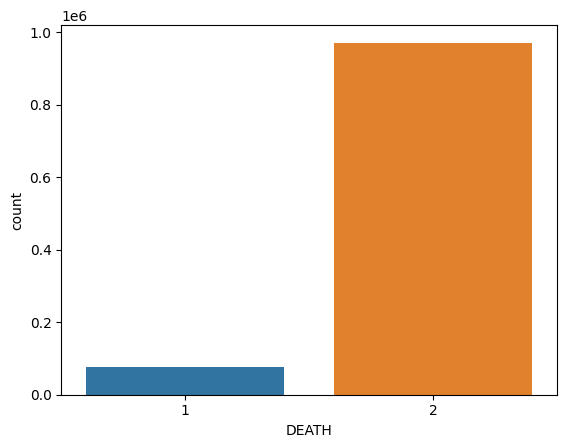

In [18]:
sns.countplot(data = df_fe, x = 'DEATH')
plt.show()

โดยจะเห็นได้ว่าค่าของ DEATH นั้นมีแค่ 1 กับ 2 ที่เป็น boolean features แต่ค่าทั้งสองนั้น ไม่ สมดุลกัน(balance) และหากเรานำข้อมูลนี้ไป train กับ model อาจทำให้เกิดปัญหาที่ model เรียนรู้และทำนายผลว่า 2(รอด)นั้นได้ดีกว่าทำนายผลว่า 1(ตาย) เราเรียกปัญหานี้ว่า Imnalance data.

**Undersampling**

เป็นขั้นตอนการลบตัวอย่างจากคลาสมากเพื่อทำให้ข้อมูลมีความสมดุล ในกรณีที่มีจำนวนข้อมูลมากและการสูญเสียข้อมูลไม่สำคัญ.

และเงื่อนไขของวิธีการนี้ตรงกับ data ที่เรามีอยู่ และสามารถช่วยแก้ปัญหา Imbalance data ได้ โดยสามารถใช้ Library mbalanced-learn ได้.

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='auto')

X_resampled, y_resampled = undersample.fit_resample(X, y)

print(Counter(y_resampled))

Counter({1: 76942, 2: 76942})


In [20]:
X_resampled_df = pd.DataFrame(X_resampled, columns=['PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'ICU', 'CLASIFFICATION_FINAL'])

y_resampled_df = pd.DataFrame(y_resampled, columns=['DEATH'])

subset_data = pd.concat([X_resampled_df, y_resampled_df], axis=1)

In [21]:
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153884 entries, 0 to 153883
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PATIENT_TYPE          153884 non-null  int64  
 1   INTUBED               153884 non-null  float64
 2   PNEUMONIA             153884 non-null  float64
 3   DIABETES              153884 non-null  float64
 4   HIPERTENSION          153884 non-null  float64
 5   ICU                   153884 non-null  float64
 6   CLASIFFICATION_FINAL  153884 non-null  int64  
 7   DEATH                 153884 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 9.4 MB


**Data Visualization**

เป็นขั้นตอนเพื่อให้เราเข้าใจลักษณะของข้อมูลและการกระจายตัวของ features ในชุดข้อมูล.

นี่เป็นวิธีที่ดีในการตรวจสอบว่า StandardScaler จำเป็นหรือไม่สำหรับข้อมูลของเรานั่นเอง.

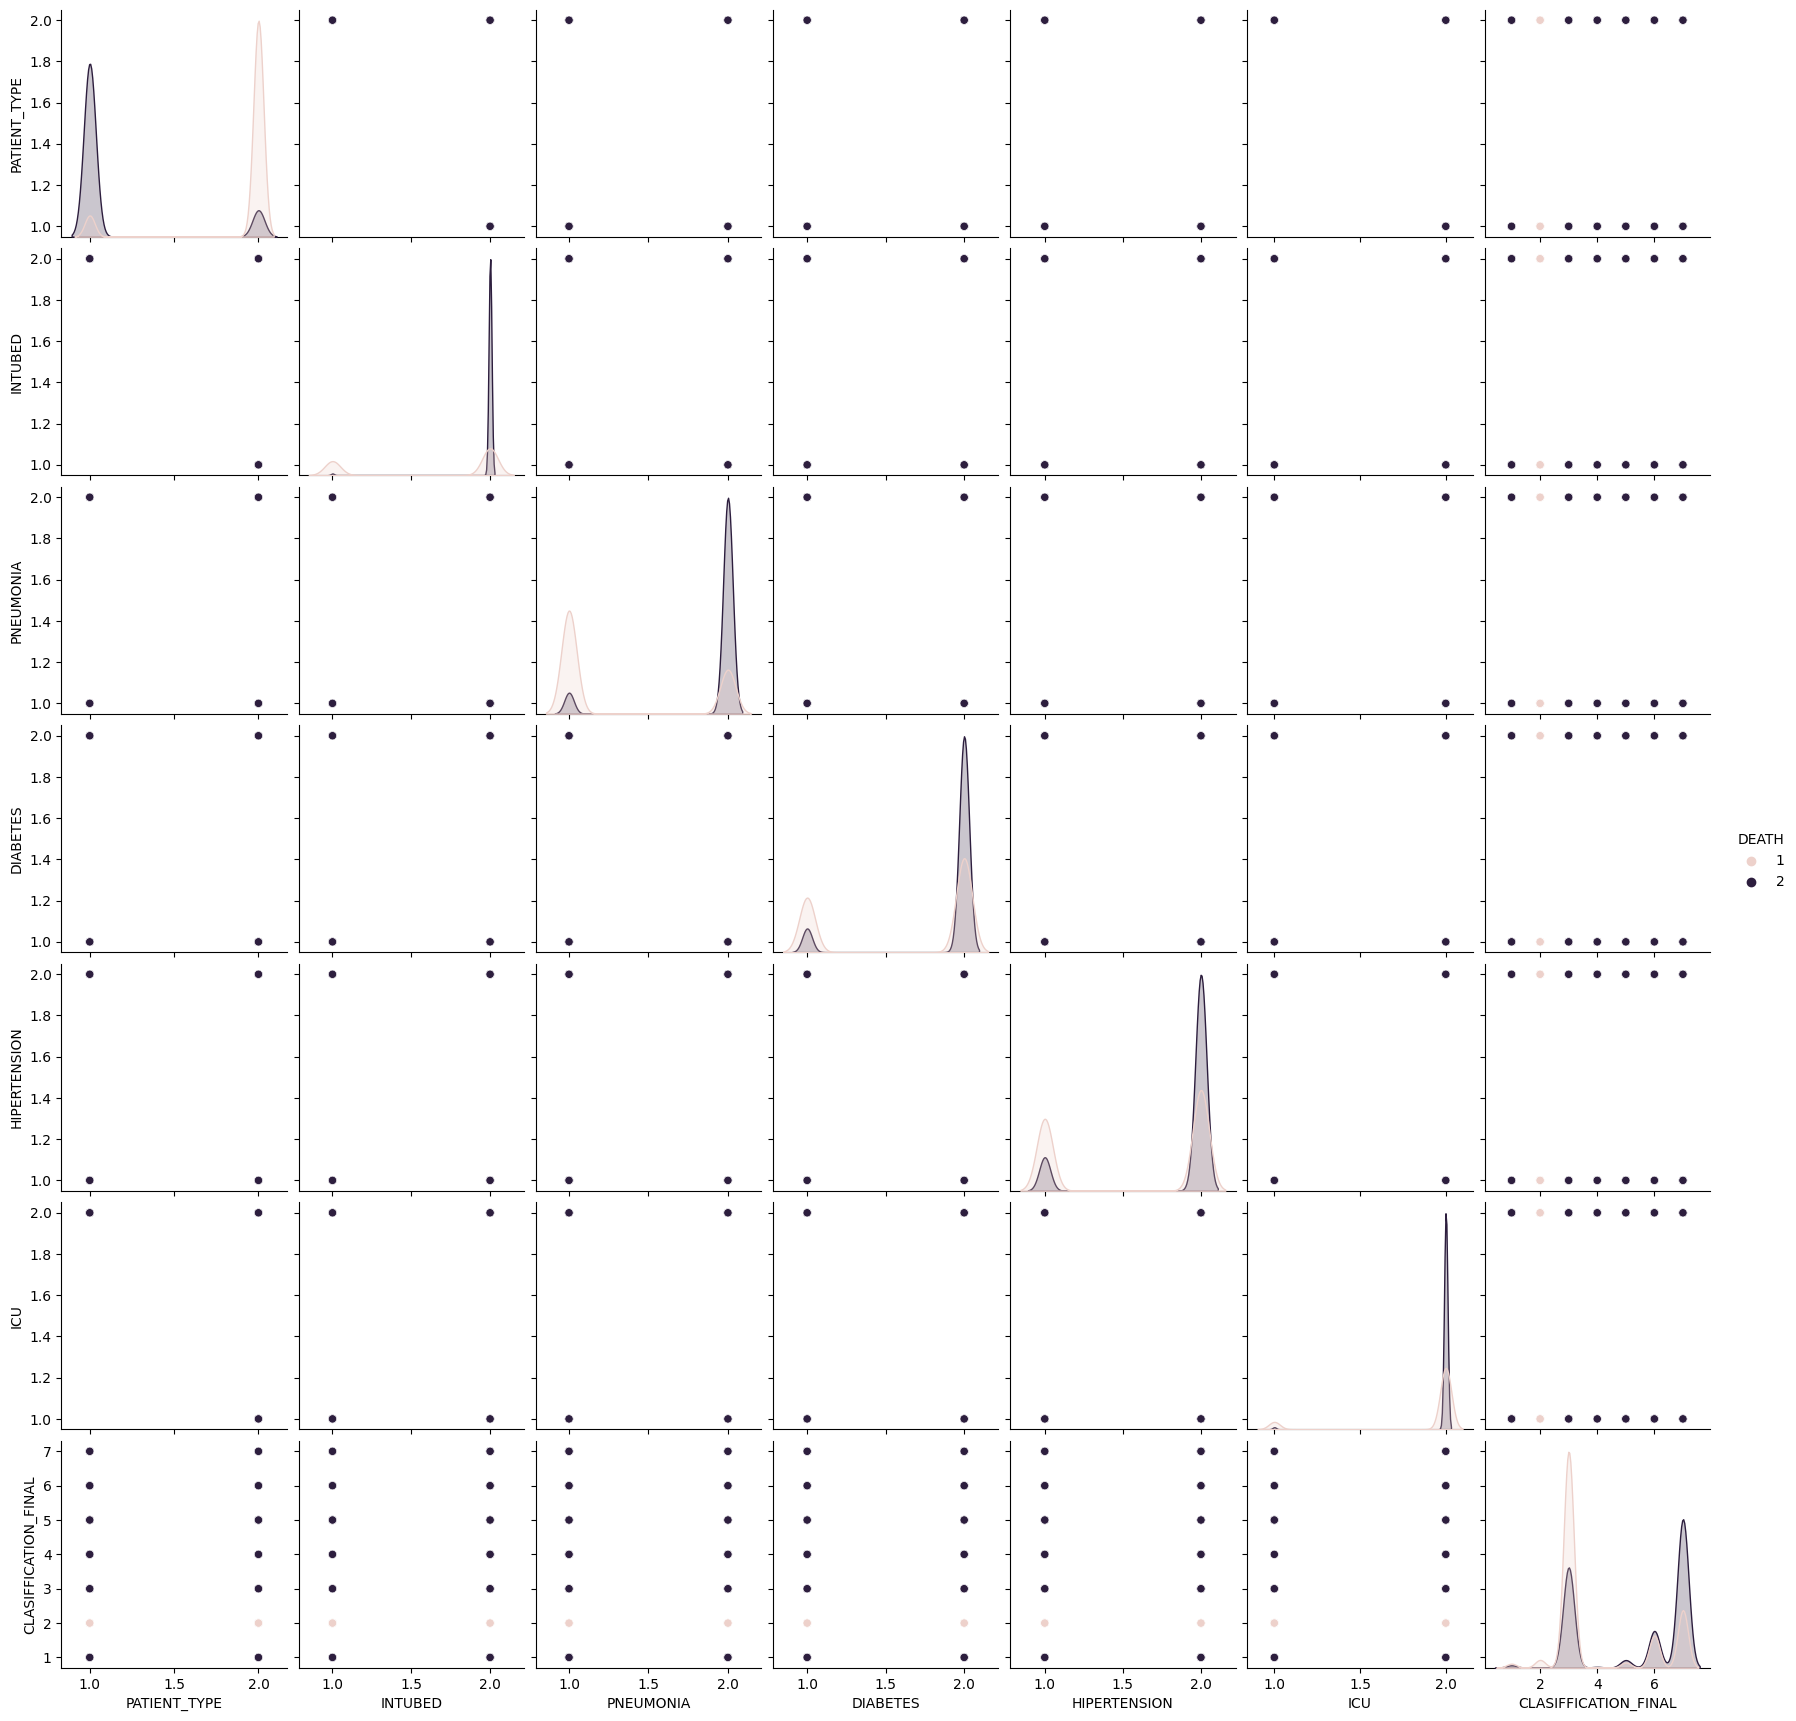

In [22]:
sns.pairplot(data=subset_data, hue='DEATH', vars=['PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'DIABETES', 'HIPERTENSION', 'ICU', 'CLASIFFICATION_FINAL'])
plt.show()

จากการ pair plot จะพบว่าข้อมูลมีการกระจายตัวและมีความสัมพันธ์ที่ต่างกันใน features แต่ละ features ของชุดข้อมูล.

ดังนั้นกลุ่มเราจึงตัดสินใจใช้ Standard Scaler.

**Standard Scaler**

* ปรับค่าข้อมูลให้อยู่ในช่วงที่เท่ากัน: StandardScaler ช่วยให้ข้อมูลมีการกระจายตัวในช่วงที่คงที่ ซึ่งช่วยให้ model สามารถเรียนรู้ได้ดีกว่าในกรณีที่ข้อมูลมีการกระจายตัวแตกต่าง.

* ลดการกระจายตัวและความผันผวน: การปรับค่าข้อมูลเหล่านี้ช่วยลดความสัมพันธ์ของข้อมูลที่มีการกระจายตัวและความผันผวนมาก ซึ่งอาจช่วยลดโอกาสการเกิดการเรียนรู้ที่เห็นได้ชัดและทำให้ model มีความสามารถในการทำนายที่ดีกว่า.

* ช่วยให้คุณสมบัติที่ต่างกันมีสเกลและหาสเกล: การปรับค่าข้อมูลด้วย StandardScaler ช่วยให้ features ที่ต่างกันทางสเกลและทางเป็นบวกหรือลบไม่มีผลกระทบในการ training ของ model.

โดยทั้ง 3 ประโยชน์ของ StandardScaler ที่กล่าวมานี้ตรงตามสิ่งที่กลุ่มของเราคาดหวังไว้สำหรับชุดข้อมูลของกลุ่มเราดังนั้นเราจึงเลือกที่จะทำวิธีการนี้ | โดยสามารถใช้ StandardScaler ผ่าน Library ของ sklearn.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)

หลังจากที่ทำ StandardScaler เราจะมาดูการกระจายของข้อมูลใหม่จาก pairplot

In [24]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_resampled_df.columns)

pairplot_data = X_scaled_df.copy()
pairplot_data['DEATH'] = y_resampled_df['DEATH']

In [25]:
pairplot_data.isna().sum()

PATIENT_TYPE            0
INTUBED                 0
PNEUMONIA               0
DIABETES                0
HIPERTENSION            0
ICU                     0
CLASIFFICATION_FINAL    0
DEATH                   0
dtype: int64

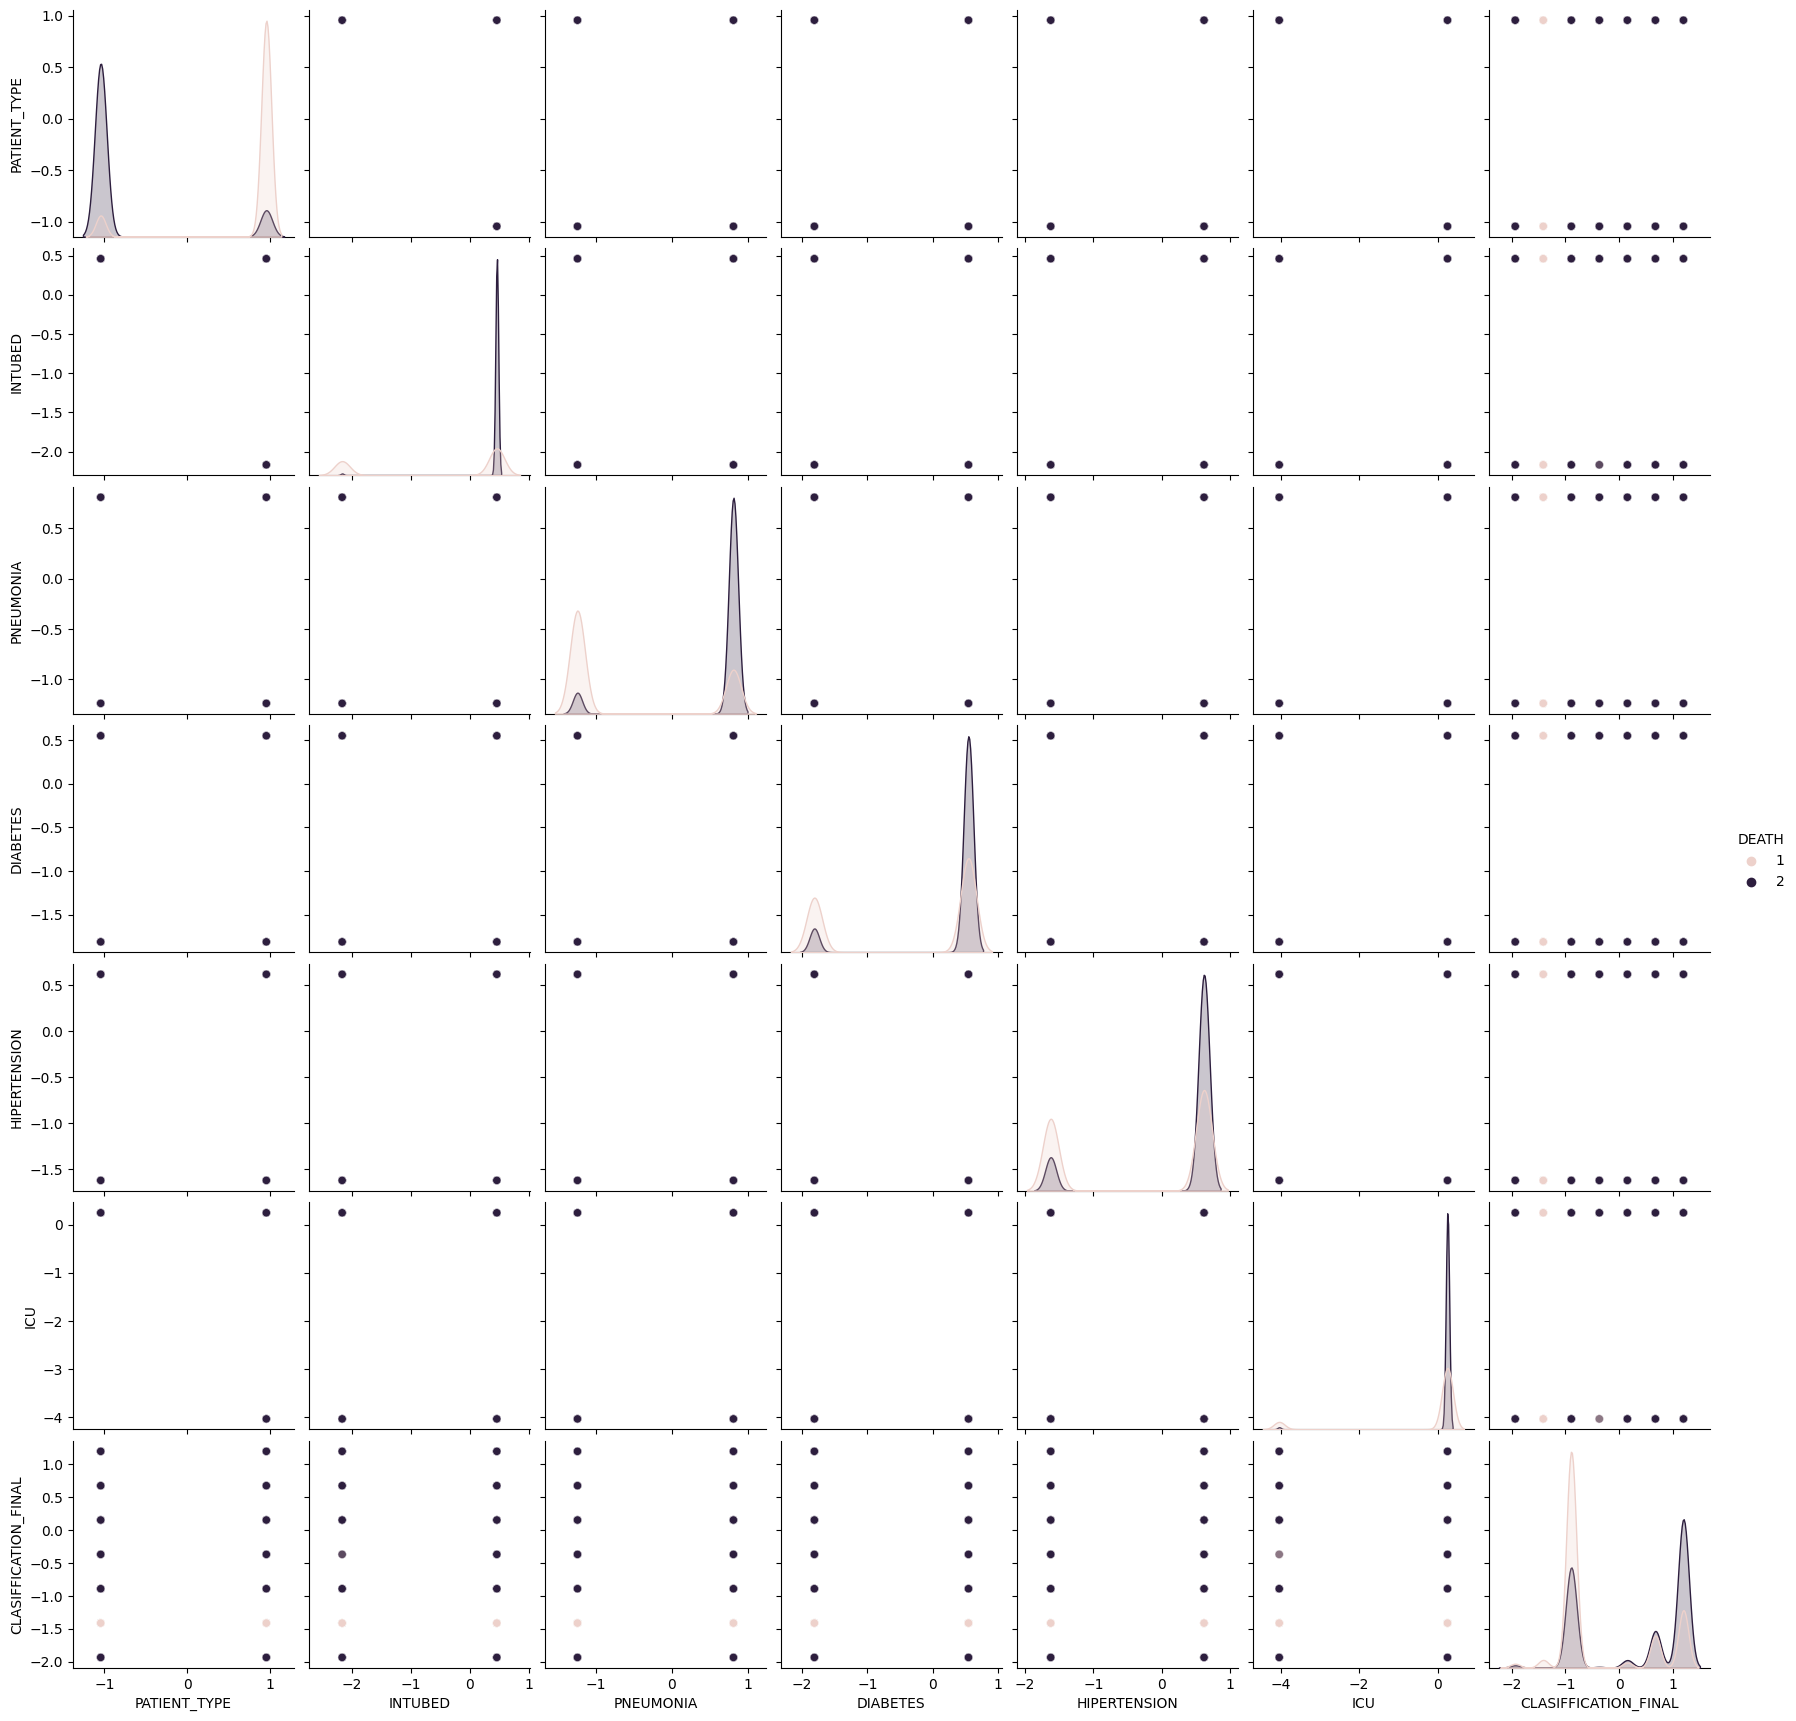

In [26]:
##
sns.pairplot(pairplot_data, hue='DEATH', plot_kws={'alpha': 0.5})
plt.show()

**Instantiate Model**

เริ่มต้นการสร้าง Logistic Regression Model โดยใช้ sklearn Library.

แต่ก่อนหน้านั้นเราจำเป็นต้อง split data เพื่อให้ model ได้เรียนรู้ชุดข้อมูลได้ทั่วถึง.

import LogissticRegression และ train_test_split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

split data เป็นส่วนๆดังนี้ training data ที่ 80%, และ test set 20%

In [28]:
## เริ่มต้นการ split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_resampled, test_size=0.2, random_state=42)

instatiate model เริ่มสร้าง LogisticRegression model, และให้ model ทำเริ่มการเรียนรู้โดยใช้ .fit()

In [29]:
# instantiate และ train model Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [30]:
# ทำนายผลลัพธ์บน test set
y_pred = logistic_model.predict(X_test)
print(y_pred)

[1 2 1 ... 1 1 1]


**Evaluation model**

เราสามารถวัดค่า/ตรวจสอบว่า model ของเรานั้น train ออกมาได้ดีแค่ไหน, perform ออกมาได้ดีมากน้อยเท่าไหร่ผ่าน classification_report, accuracy_score, confusion_matrix และอื่นๆ แต่สำหรับ model นี้เราจะใช้ แค่ 3 ค่านี้ในการวัดผลว่า model perform ออกมาได้ดีหรือเปล่า

In [49]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_absolute_error

# วัด performance ของ model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)
print("\nMean Absolute Error (MAE):", mae)

Accuracy: 0.883744354550476

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.88      0.88     15296
           2       0.88      0.89      0.88     15481

    accuracy                           0.88     30777
   macro avg       0.88      0.88      0.88     30777
weighted avg       0.88      0.88      0.88     30777


Mean Absolute Error (MAE): 0.11625564544952399


**Confusion Matrix**

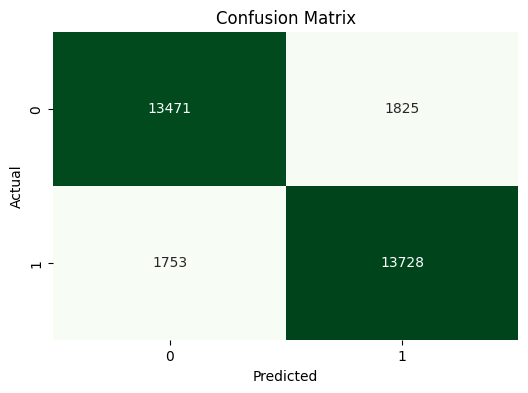

In [48]:
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**ROC Curve**

จะบ่งบอกความสามารถในการแยกแยะระหว่างคลาสบวกและคลาสลบโดยใช้ค่าความน่าจะเป็นที่คำนวณจาก model (ในกรณีนี้คือ Logistic Regression model) เพื่อให้เห็นความสามารถในการจำแนกข้อมูลบวกและลบต่างๆ ของ model

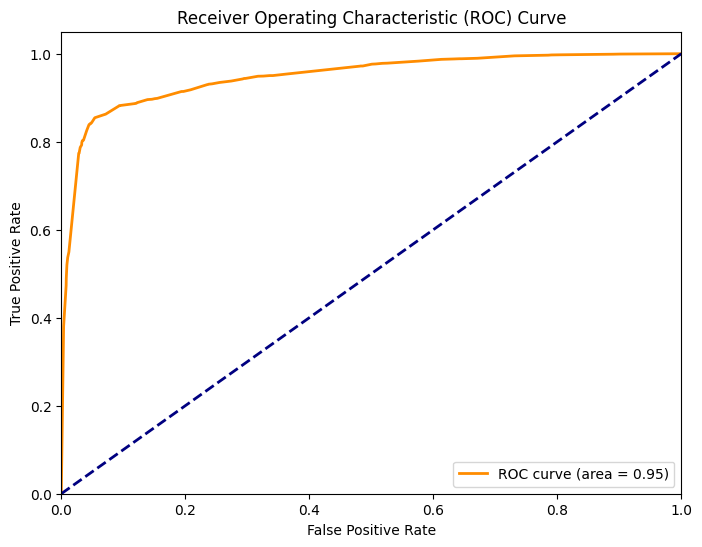

In [66]:
from sklearn.metrics import roc_curve, auc

# แปลงค่าใน y_true จาก {1, 2} เป็น {0, 1}
y_true_binary = (y_test == 2).astype(int).ravel()
y_scores = logistic_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores)
roc_auc = auc(fpr, tpr)

# พล็อต ROC Curve โดยระบุ pos_label=1
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

* เส้นกราฟ ROC (สีส้ม) แสดงความสัมพันธ์ระหว่างอัตราเท็จ (True Positive Rate) และ อัตราเท็จลบ (False Positive Rate) ของ model ในการจำแนกข้อมูลบวกและลบ เส้นกราฟนี้จะวาดจากจุด (0,0) ถึงจุด (1,1) และยิ่งสูงขึ้นที่จุด (0,1) แสดงว่า model มีประสิทธิภาพมากขึ้นในการจำแนกข้อมูลบวกและลบ

* ความสนใจอยู่ในพื้นที่ใต้เส้น ROC Curve ซึ่งเรียกว่า AUC (Area Under the Curve) มากเท่าไหร่ ค่า AUC ยิ่งใกล้ 1 แสดงว่า model มีประสิทธิภาพมากในการจำแนกข้อมูลบวกและลบ ส่วนถ้า AUC เข้าใกล้ 0.5 แสดงว่าความสามารถในการจำแนกข้อมูลของ model เข้าใกล้กับการทายแบบสุ่ม

* ในกรณีนี้ AUC = 0.95 แสดงว่า Logistic Regression model มีความสามารถในการจำแนกข้อมูลบวกและลบอย่างมีประสิทธิภาพและเหมาะสำหรับงานทำนายข้อมูลด้วย Logistic Regression model.

In [68]:
print(f"AUC: {roc_auc:.2f}")

AUC: 0.95


# **Conclusion**

* เนื่องจากค่าที่วัดได้จากตัว model: ค่า accuracy และค่าอื่นๆจะอยู่ที่ราวๆ 88%
* และเมื่อมาดู MAE(Mean Absolute Error): 0.11745784189492153 นั้นเป็นค่าที่น้อยมากเข้าใกล้กับศูนย์ แสดงถึงความแม่นยำของ model ในการทำนายค่า 'DEATH' บน test set ที่ใช้.
* หากมอง score โดยรวมแล้ว แม้จะยังไม่ได้ optimization ตัว model ให้ดีเท่าที่ควร แต่ก็ถือว่าเป็น model perform ออกมาได้ดีเลยทีเดียว
* และค่า AUC(Area Under the Curve) นั้นอยู่ที่ 0.95 นั่นสามารถพูดได้ว่า model นี้ perform ออกมาได้อย่างมีประสิทธิภาพ.

# **สมาชิกในกลุ่ม**

* 64143167 นาย กฤตภาส วงศ์ชัย
* 64143130 นาย ณัชพล อินภิรมย์
* 64143190 นาย หิรัญ ศรีประทุม
* 64143165 นางสาว กรรณิการ์ มหาวัน
* 64143166 นางสาว เมธาพร ส่องหล้า
* 64143118 นาย ธนชัย ยาตรา
* 64143198 นาย ภูเบศ วิรัตน์เกษ